# Data Understanding

In [1]:
# Here are all the imports needed for this phase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Dataset identity card

We use one csv file accessible from this [repository](https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data). We limit ourselves to the data for April 2014, which contains a sample of the races conducted during this period in New York City alone.

In [2]:
uber_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")

In [3]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [4]:
uber_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
uber_df.isnull().any()

Date/Time    False
Lat          False
Lon          False
Base         False
dtype: bool

There are no missing values in this dataset.

## Field description

This dataset contains 564 516 samples and 4 features : 
- __Date/Time__ corresponds to the date and time of the Uber pickup
- __Lat__ is a numerical variable that represents the latitude of the Uber pickup
- __Lon__ is a numerical feature containing the longitude of the Uber pickup
- __Base__ is an identifier, it is the TLC (Taxi & Limousine Commission) base company code affiliated with the Uber pickup.

In [6]:
uber_df.describe(include="all")

,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,41999,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02682
freq,97,NaN,NaN,227808
mean,NaN,40.740005,-73.976817,NaN
std,NaN,0.036083,0.050426,NaN
min,NaN,40.072900,-74.773300,NaN
25%,NaN,40.722500,-73.997700,NaN
50%,NaN,40.742500,-73.984800,NaN
75%,NaN,40.760700,-73.970000,NaN


## Descriptive Statistics

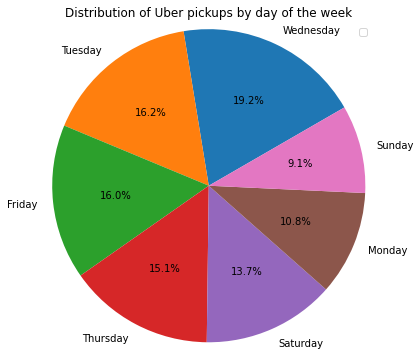

In [7]:
pd.to_datetime(uber_df["Date/Time"]).dt.day_name().value_counts().plot.pie(
    radius=1.2, 
    autopct='%1.1f%%', 
    startangle=30,
    figsize=(11, 6)
)
plt.legend('')
plt.ylabel('')
plt.title("Distribution of Uber pickups by day of the week")
plt.show()

* As can be seen, the days of week can be grouped into two categories : 
    - Tuesday, Wednesday, Thursday, Friday with an average rate of 16% of weekly pickups
    - Monday, Saturday, Sunday with an average of 11% of pickups
* Wednesday is the day of the week with the highest number of pick-ups : almost 20% of the pick-ups in April.

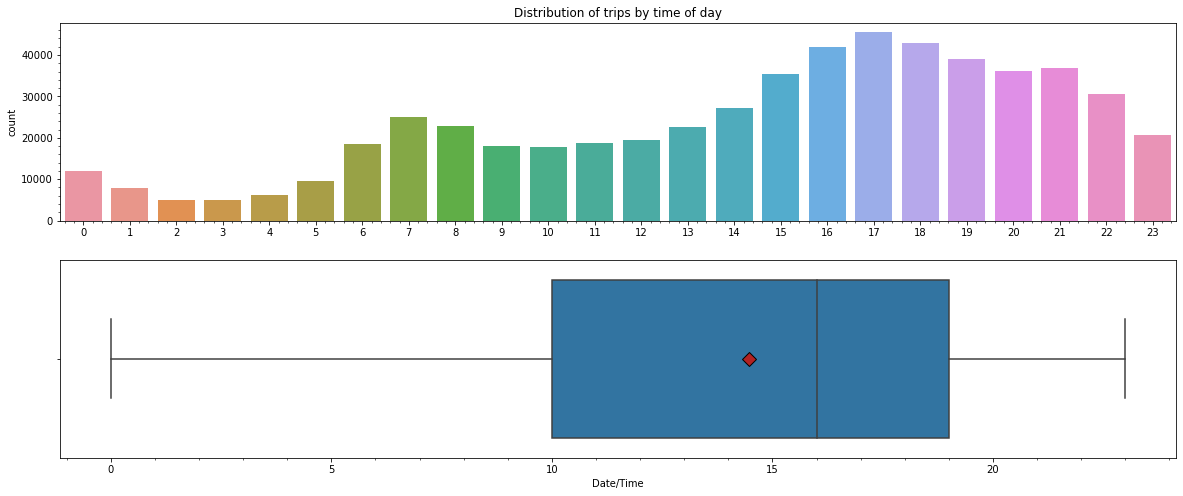

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(211)
sns.countplot(x=pd.to_datetime(uber_df["Date/Time"]).dt.hour)
plt.minorticks_on()
plt.xlabel('')
plt.title("Distribution of trips by time of day")

plt.subplot(212)
sns.boxplot(
    pd.to_datetime(uber_df["Date/Time"]).dt.hour, 
    showmeans=True, 
    meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick', markersize=10)
)
plt.minorticks_on()

plt.show()

* 50% of pick-ups are made between 10am and 7pm.
* 50% of trips are performed from 4pm to 11pm.
* A quarter of all pick-ups are carried out between midnight and 10am.
* It is possible to divide the time of day into several classes : 
    - from midnight to 5am
    - from 6am to 8am,
    - from 9am to 12pm,
    - from 1pm to 5pm,
    - from 6pm to 11pm.

In [9]:
def compute_percentage(start, end):
    res = ((pd.to_datetime(uber_df["Date/Time"]).dt.hour >= start) & (pd.to_datetime(uber_df["Date/Time"]).dt.hour <= end)).value_counts() / uber_df.shape[0]
    return (res * 100)[1]

In [10]:
print('{:.2f} % of trips are made between midnight and {}am.'.format(compute_percentage(0, 5), 5))
print('{:.2f} % of trips are made between {}am and {}am.'.format(compute_percentage(6, 8), 6, 8))
print('{:.2f} % of trips are made between {}am and {}pm.'.format(compute_percentage(9, 12), 9, 12))
print('{:.2f} % of trips are made between {}pm and {}pm.'.format(compute_percentage(13, 17), 1, 5))
print('{:.2f} % of trips are made between {}pm and {}pm.'.format(compute_percentage(18, 23), 6, 11))

8.01 % of trips are made between midnight and 5am.
11.74 % of trips are made between 6am and 8am.
13.11 % of trips are made between 9am and 12pm.
30.57 % of trips are made between 1pm and 5pm.
36.57 % of trips are made between 6pm and 11pm.


## At this stage of analysis

* We focused on the day and time of the trip alone to identify groups.
* We have found two groups by day of pick-up and 5 groups by time of day. 
* In the Modeling and Evaluation phase, we will visualise on a map the pick-up locations of our data sample.
* In the next phase (Data Preparation), we will format the data so that we can locate groups on a map according to days of the week and time of day.